# **Telecom Churn Data**

*Authors:*
- *Myroslava Sánchez Andrade A01730712*
- *Karen Rugerio Armenta A01733228*
- *José Antonio Bobadilla García A01734433*
- *Alejandro Castro Reus A01731065*

*Creation date: 01/10/2022*

*Last updated: 27/10/2022*

---

### **INDEX**
[Business Understanding](#business-understanding)
<br> [Data Understanding](#data-understanding)
<br> [Data Preparation](#data-preparation)
<br> [Modelling](#modelling)

***
## **Business Understanding**

Como parte de nuestro proyecto final de la materia Inteligencia Artificial Avanzada para la Ciencia de Datos, se nos asignó una problemática dada por la empresa NAATIK. Esta es una empresa enfocada en el desarrollo y aplicación de Inteligencia Artificial y Ciencia de Datos para brindar soluciones.
<br>La problemática planteada consiste en el análisis de un conjunto de datos de una compañía telefónica que contiene los siguientes datos: servicios contratados de clientes, información de la cuenta de los clientes, información demográfica de los clientes, y la permanencia del cliente en el último mes (booleano). 


***
## **Data Understanding**

Dados los requerimientos del socio formador, se buscó implementar soluciones generalizadas para cualquier conjunto de datos referentes a la permanencia o no de un cliente a un servicio, para así poder hacer un análisis de retención de clientes.

***
## **Data Preparation**

#### **ETL:**
- Extracción de los datos
- Análisis de columnas
- Codificación de columnas categóricas
- Multicolinealidad
- Estandarización
- Manejo de valores atípicos
- Análisis de filas
- Imputación
- Preparación de los datos
- Carga de los datos

In [1]:
# Function that transforms the dataset **for the modelling**
from fragments.functions.transform_model import transform_df_model

# Function that transforms the dataset **for the prediction**
from fragments.functions.transform_prediction import transform_df_predict

# Function that trains the model mlp
from fragments.functions.model_mlp import train_mlp

In [2]:
# Importing the necessary libraries
import pandas as pd
from joblib import load, dump

In [3]:
# Reading the csv
df = pd.read_csv('../data/telecom_churn_me/telecom_churn_me.csv')
original_name_dataset = 'telecom_churn_me'
target_column_name = 'TARGET'

In [ ]:
transform_df_model(df, target_column_name, original_name_dataset)

***
## **Model training and Evaluation**

c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Model: 96%
        0      1
0  323638  15291
1       0   3252


c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


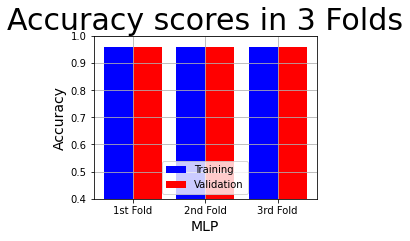

In [4]:
model_accuracy, confussion_matrix, mlp_results = train_mlp(target_column_name, original_name_dataset)

In [5]:
model_accuracy

'Accuracy of Model: 96%'

In [6]:
confussion_matrix

,0,1
0,323638,15291
1,0,3252


In [7]:
mlp_results

{'Training Accuracy scores': array([0.95891276, 0.95895785, 0.95910251]),
 'Mean Training Accuracy': 95.89910360798724,
 'Training Precision scores': array([1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([0.21260126, 0.21346535, 0.2162094 ]),
 'Mean Training Recall': 0.2140920037132251,
 'Training F1 scores': array([0.35065321, 0.35182768, 0.35554635]),
 'Mean Training F1 Score': 0.35267574275118124,
 'Validation Accuracy scores': array([0.95912693, 0.9590593 , 0.9587587 ]),
 'Mean Validation Accuracy': 95.89816425629022,
 'Validation Precision scores': array([1., 1., 1.]),
 'Mean Validation Precision': 1.0,
 'Validation Recall scores': array([0.21667747, 0.21538129, 0.20967742]),
 'Mean Validation Recall': 0.21391205978206584,
 'Validation F1 scores': array([0.35617898, 0.35442588, 0.34666667]),
 'Mean Validation F1 Score': 0.3524238412609924}

***
## **Making new predictions**

In [5]:
new_df = pd.read_csv('../data/telecom_churn_me/telecom_churn_me_new.csv')
original_name_dataset = 'telecom_churn_me'

In [6]:
transform_df_predict(new_df, original_name_dataset)

In [7]:
# Loading the model|
model = load(f'./fragments/joblibs/{original_name_dataset}/model/classification-model.joblib')
model

MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 50), max_iter=100,
              random_state=1)

In [8]:
df_to_predict = pd.read_csv('../data/telecom_churn_me/transformed_new.csv')

#Predicting y for X_val
y_pred_prob = model.predict_proba(df_to_predict)
y_pred = model.predict(df_to_predict)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,